<a href="https://colab.research.google.com/github/jhparra777/precio-combustible-economico/blob/football_world_cup_dataset/FIFA_Football_World_Cup_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inmersion de datos_ con Python** 
###**https://www.kaggle.com**
###**FIFA - Football World Cup Dataset**
#*Jesús Parra*
 

# **Librerias Python**

In [ ]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

# **Conectar Unidad de Drive - Google**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Asignaciones**

In [ ]:
fuentes_datos=['FIFA - 1930.csv', 'FIFA - 1934.csv', 'FIFA - 1938.csv', 'FIFA - 1950.csv', 'FIFA - 1954.csv', 'FIFA - 1958.csv', 'FIFA - 1962.csv', 'FIFA - 1966.csv', 'FIFA - 1970.csv', 'FIFA - 1974.csv', 'FIFA - 1978.csv', 'FIFA - 1982.csv', 'FIFA - 1986.csv', 'FIFA - 1990.csv', 'FIFA - 1994.csv', 'FIFA - 1998.csv', 'FIFA - 2002.csv', 'FIFA - 2006.csv', 'FIFA - 2010.csv', 'FIFA - 2014.csv', 'FIFA - 2018.csv', 'FIFA - 2022.csv']
fuentes_datos[0][7:11]
len(fuentes_datos)

22

In [ ]:
datos_mundial=[]
mundiales = []
for tabla in fuentes_datos:
  mundial = pd.read_csv(f"/content/drive/MyDrive/Ciencia_de_Datos/Football/datos/{tabla}")
  datos_mundial.append(mundial)
  mundiales.append(tabla[7:11])

for i in range(len(mundiales)):
  datos_mundial[i]['Mundial']=int(mundiales[i])

# **Data Extraction**

In [ ]:
datos_mundial[21]

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Mundial
0,1,Argentina,7,6,0,1,15,8,7,18,2022
1,2,France,7,5,0,2,16,8,8,15,2022
2,3,Croatia,7,4,2,1,8,7,1,14,2022
3,4,Morocco,7,4,1,2,6,5,1,13,2022
4,5,England,5,3,1,1,13,4,9,10,2022
5,6,Netherlands,5,3,1,1,10,4,6,10,2022
6,7,Portugal,5,3,0,2,12,6,6,9,2022
7,8,Brazil,5,3,0,2,8,3,5,9,2022
8,9,Japan,4,2,0,2,5,4,1,6,2022
9,10,Senegal,4,2,0,2,5,7,-2,6,2022


In [ ]:
fifa = pd.DataFrame()
for i in range(len(mundiales)):
  fifa = pd.concat([fifa, datos_mundial[i]])
fifa

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Mundial
0,1,Uruguay,4,4,0,0,15,3,12,8,1930
1,2,Argentina,5,4,0,1,18,9,9,8,1930
2,3,United States,3,2,0,1,7,6,1,4,1930
3,4,Yugoslavia,3,2,0,1,7,7,0,4,1930
4,5,Chile,3,2,0,1,5,3,2,4,1930
...,...,...,...,...,...,...,...,...,...,...,...
27,28,Denmark,3,0,1,2,1,3,-2,1,2022
28,29,Serbia,3,0,1,2,5,8,-3,1,2022
29,30,Wales,3,0,1,2,1,6,-5,1,2022
30,31,Canada,3,0,0,3,2,7,-5,0,2022


In [ ]:
fifa.shape

(489, 11)

In [ ]:
fifa.dtypes

Position            int64
Team               object
Games Played        int64
Win                 int64
Draw                int64
Loss                int64
Goals For           int64
Goals Against       int64
Goal Difference    object
Points              int64
Mundial             int64
dtype: object

In [ ]:
fifa.isnull().any()

Position           False
Team               False
Games Played       False
Win                False
Draw               False
Loss               False
Goals For          False
Goals Against      False
Goal Difference    False
Points             False
Mundial            False
dtype: bool

In [ ]:
fifa.loc[fifa["Team"] == 'Argentina', "Team"] = 'Argentina'

In [ ]:
fifa_equipos = fifa.groupby(['Team']).sum()
fifa_equipos.head(10)

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points,Mundial
Team,,,,,,,,,
Algeria,77,13,3,3,7,13,19,10,7992
Angola,23,3,0,2,1,1,2,2,2006
Argentina,125,88,49,15,24,152,101,138,35724
Australia,119,20,4,4,12,17,37,16,12044
Austria,78,29,12,4,13,43,47,28,13794
Belgium,162,51,21,10,20,69,74,66,27732
Bolivia,46,6,0,1,5,1,20,1,5874
Bosnia and Herzegovina,20,3,1,0,2,4,4,3,2014
Brazil,104,114,76,18,20,237,108,202,43536


In [ ]:
fifa_equipos['Win Rate'] = (fifa_equipos['Win']/fifa_equipos['Games Played'])*100
fifa_equipos

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points,Mundial,Win Rate
Team,,,,,,,,,,
Algeria,77,13,3,3,7,13,19,10,7992,23.076923
Angola,23,3,0,2,1,1,2,2,2006,0.000000
Argentina,125,88,49,15,24,152,101,138,35724,55.681818
Australia,119,20,4,4,12,17,37,16,12044,20.000000
Austria,78,29,12,4,13,43,47,28,13794,41.379310
...,...,...,...,...,...,...,...,...,...,...
Uruguay,142,59,25,13,21,89,76,73,27748,42.372881
Wales,35,8,1,4,3,5,10,6,3980,12.500000
West Germany,29,62,36,14,12,131,77,86,19720,58.064516


In [ ]:
fifa_equipos = fifa_equipos.sort_values(['Games Played','Win'], ascending = False)
fifa_equipos

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points,Mundial,Win Rate
Team,,,,,,,,,,
Brazil,104,114,76,18,20,237,108,202,43536,66.666667
Argentina,125,88,49,15,24,152,101,138,35724,55.681818
Italy,140,82,44,21,17,127,77,123,35608,53.658537
England,131,74,32,22,20,104,68,100,31788,43.243243
France,140,73,39,13,21,136,85,115,31696,53.424658
...,...,...,...,...,...,...,...,...,...,...
Togo,30,3,0,0,3,1,6,0,2006,0.000000
Trinidad and Tobago,27,3,0,1,2,0,4,1,2006,0.000000
United Arab Emirates,24,3,0,0,3,2,11,0,1990,0.000000


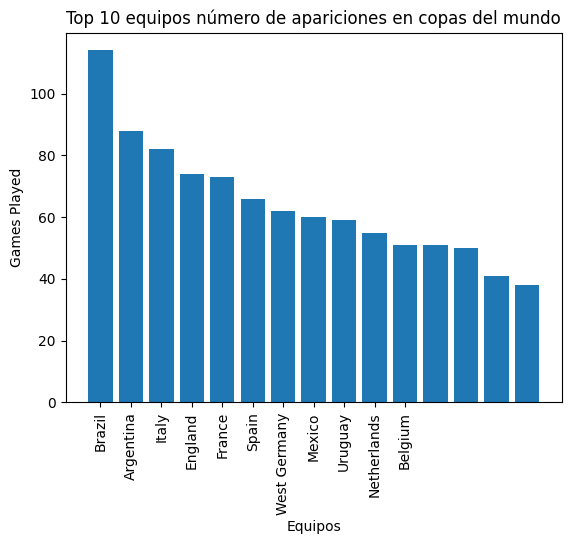

In [ ]:
equipos = [equipo for equipo in fifa_equipos.index]

plt.bar(equipos[:15],fifa_equipos['Games Played'][:15])
plt.xticks(equipos[:11], rotation = 'vertical', size = 10)
plt.ylabel('Games Played')
plt.xlabel('Equipos')
plt.title('Top 10 equipos número de apariciones en copas del mundo')
plt.show()

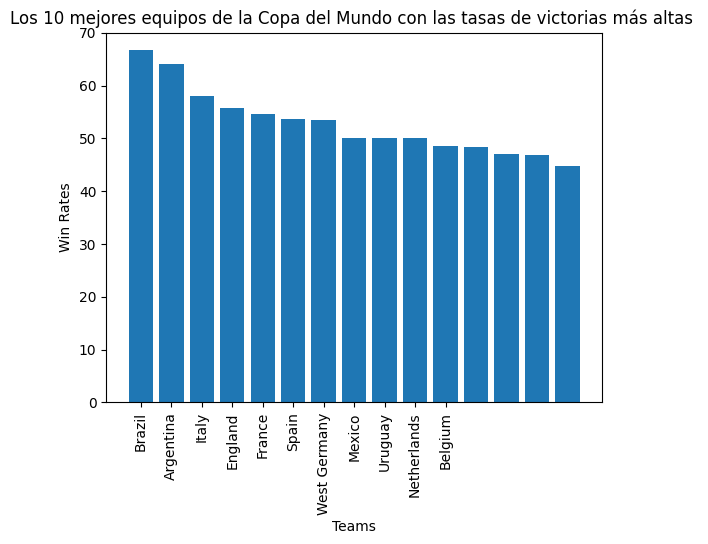

In [ ]:
fifa_equipos = fifa_equipos.sort_values(['Win Rate'], ascending = False)

plt.bar(equipos[:15],fifa_equipos['Win Rate'][:15])
plt.xlabel('Teams')
plt.ylabel('Win Rates')
plt.xticks(equipos[:11], rotation='vertical', size = 10)
plt.title('Los 10 mejores equipos de la Copa del Mundo con las tasas de victorias más altas ')
plt.show()

In [ ]:
worldcup_summary = pd.read_csv('/content/drive/MyDrive/Ciencia_de_Datos/Football/datos/FIFA - World Cup Summary.csv') 
worldcup_summary.head(5)

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [ ]:
table_CHAMPION_summ = worldcup_summary['CHAMPION'].value_counts()

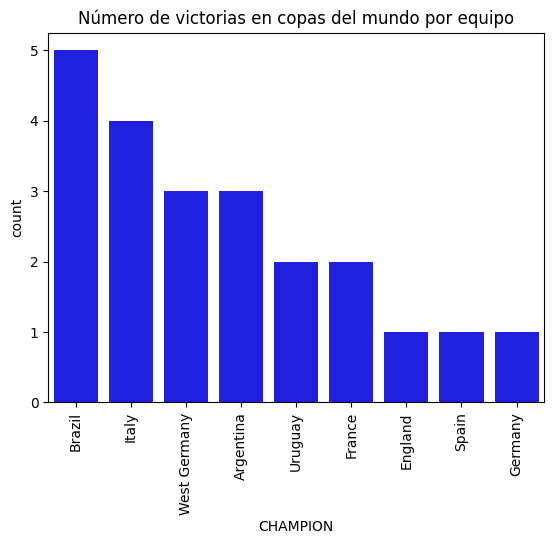

In [ ]:
sns.countplot(data=worldcup_summary, x='CHAMPION', order=table_CHAMPION_summ.index.values, color='b')
plt.title('Número de victorias en copas del mundo por equipo')
plt.xticks(rotation=90);

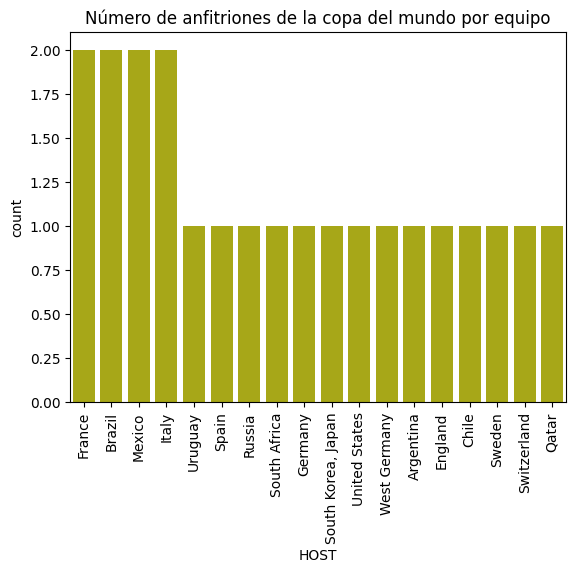

In [ ]:
table_CHAMPION_summ = worldcup_summary['HOST'].value_counts()

sns.countplot(data=worldcup_summary, x='HOST', order=table_CHAMPION_summ.index.values, color='y')
plt.title('Número de anfitriones de la copa del mundo por equipo')
plt.xticks(rotation=90);

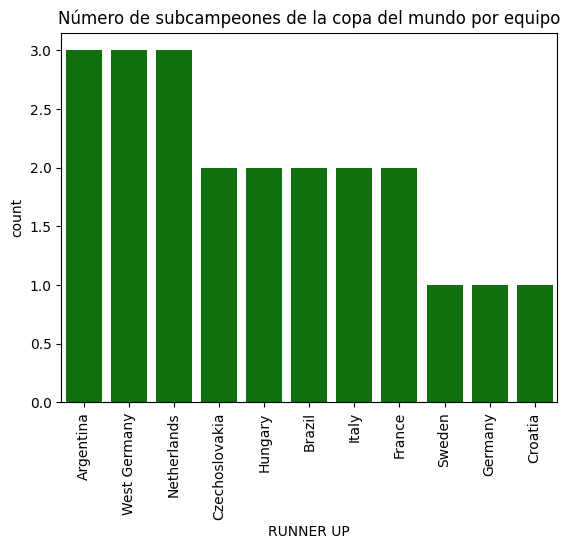

In [ ]:
table_RUNNER_UP_wc_summ = worldcup_summary['RUNNER UP'].value_counts()

sns.countplot(data=worldcup_summary, x='RUNNER UP', order=table_RUNNER_UP_wc_summ.index.values, color='g')
plt.title('Número de subcampeones de la copa del mundo por equipo')
plt.xticks(rotation=90);

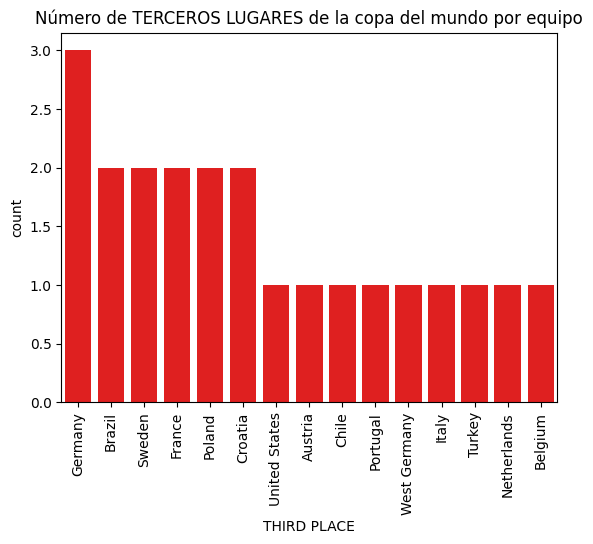

In [ ]:
table_THIRD_PLACE_wc_summ = worldcup_summary['THIRD PLACE'].value_counts()

sns.countplot(data=worldcup_summary, x='THIRD PLACE', order=table_THIRD_PLACE_wc_summ.index.values, color='r')
plt.title('Número de TERCEROS LUGARES de la copa del mundo por equipo')
plt.xticks(rotation=90);

In [ ]:
worldcup_summary['HOST WINNER'] = False
worldcup_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,False
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,False
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7,False
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0,False
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4,False


In [ ]:
worldcup_summary.loc[worldcup_summary["HOST"] == worldcup_summary["CHAMPION"], 'HOST WINNER'] = True
worldcup_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,True
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,True
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7,False
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0,False
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4,False


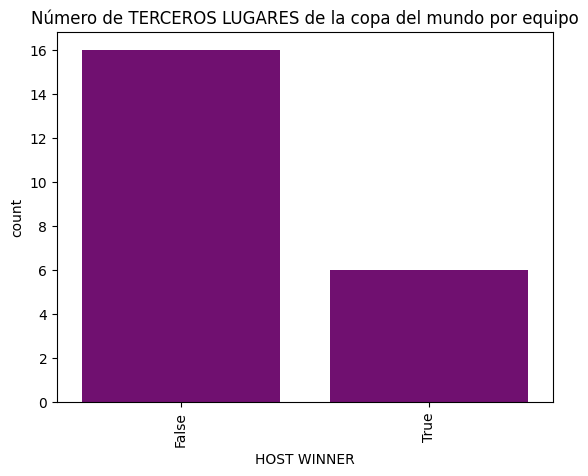

In [ ]:
sns.countplot(data=worldcup_summary, x='HOST WINNER', color='purple')
plt.title('Número de TERCEROS LUGARES de la copa del mundo por equipo')
plt.xticks(rotation=90);

In [ ]:
unique = fifa['Team'].nunique()
print(f'Hay {unique} Equipos de los 211 miembros de la fifa, que han participado en la historia de la copa del mundo de la fifa.')

Hay 88 Equipos de los 211 miembros de la fifa, que han participado en la historia de la copa del mundo de la fifa.


In [ ]:
appearences = fifa['Team'].value_counts().rename('appearences')

fifa_WCs_appearences = fifa.merge(appearences.to_frame(), left_on='Team', right_index=True) 

In [ ]:
fifa_WCs_appearences

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Mundial,appearences
0,1,Uruguay,4,4,0,0,15,3,12,8,1930,14
0,1,Uruguay,4,3,1,0,15,5,10,7,1950,14
3,4,Uruguay,5,3,0,2,16,9,7,6,1954,14
12,13,Uruguay,3,1,0,2,4,6,−2,2,1962,14
6,7,Uruguay,4,1,2,1,2,5,−3,4,1966,14
...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,Bosnia and Herzegovina,3,1,0,2,4,4,0,3,2014,1
28,29,Iceland,3,0,1,2,2,5,−3,1,2018,1
31,32,Panama,3,0,0,3,2,11,−9,0,2018,1
12,13,USA,4,1,2,1,3,4,-1,5,2022,1


In [ ]:
fifa_WCs_appearences_top_10 = fifa_WCs_appearences[fifa_WCs_appearences.appearences > 13]
fifa_WCs_appearences_top_10

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Mundial,appearences
0,1,Uruguay,4,4,0,0,15,3,12,8,1930,14
0,1,Uruguay,4,3,1,0,15,5,10,7,1950,14
3,4,Uruguay,5,3,0,2,16,9,7,6,1954,14
12,13,Uruguay,3,1,0,2,4,6,−2,2,1962,14
6,7,Uruguay,4,1,2,1,2,5,−3,4,1966,14
...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,England,5,3,2,0,6,2,4,11,2006,16
12,13,England,4,1,2,1,3,5,−2,5,2010,16
25,26,England,3,0,1,2,2,4,−2,1,2014,16
3,4,England,7,3,1,3,12,8,4,10,2018,16


In [ ]:
fifa_WCs_appearences_top_10['Team'].nunique()

9

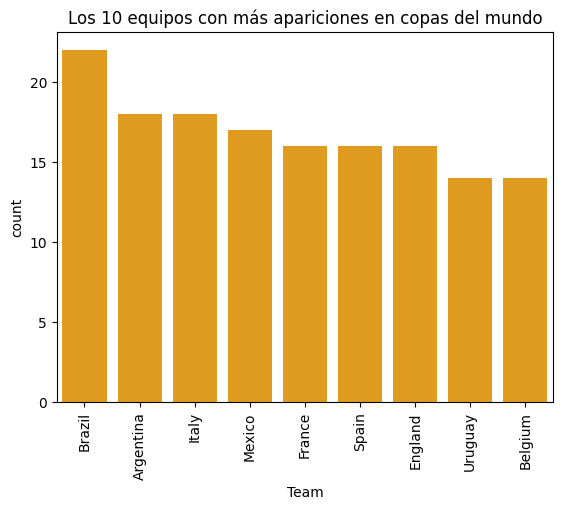

In [ ]:
table_Team_fifa_WCs_appearences_top_10 = fifa_WCs_appearences_top_10['Team'].value_counts()

sns.countplot(data=fifa_WCs_appearences_top_10, x='Team', order=table_Team_fifa_WCs_appearences_top_10.index.values, color='orange')
plt.title('Los 10 equipos con más apariciones en copas del mundo')
plt.xticks(rotation=90);

In [ ]:
fifa_WCs_appearences_bottom_10 = fifa_WCs_appearences[fifa_WCs_appearences.appearences < 2]
fifa_WCs_appearences_bottom_10

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Mundial,appearences
6,7,Cuba,3,1,1,1,5,12,−7,3,1938,1
14,15,Dutch East Indies,1,0,0,1,0,6,−6,0,1938,1
11,12,Israel*,3,0,2,1,1,3,−2,2,1970,1
12,13,Bulgaria**,3,0,1,2,5,9,−4,1,1970,1
5,6,East Germany,6,2,2,2,5,5,0,6,1974,1
14,15,Haiti,3,0,0,3,2,14,−12,0,1974,1
15,16,Zaire,3,0,0,3,0,14,−14,0,1974,1
20,21,Kuwait,3,0,1,2,2,6,−4,1,1982,1
22,23,Iraq,3,0,0,3,1,4,−3,0,1986,1
23,24,United Arab Emirates,3,0,0,3,2,11,−9,0,1990,1


In [ ]:
one_participation = fifa_WCs_appearences_bottom_10['Team'].nunique()
one_participation_percentage = one_participation/unique*100
print(f"There are {one_participation} Teams with only one world cup participation. This are {round(one_participation_percentage,2)}% of the 87 Teams who participated in fifa world cups.")

There are 25 Teams with only one world cup participation. This are 28.41% of the 87 Teams who participated in fifa world cups.


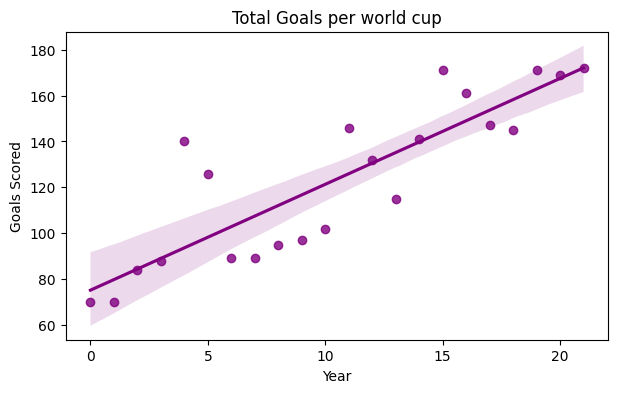

In [ ]:
plt.figure(figsize=(7,4))
sns.regplot(x=worldcup_summary.index, y=worldcup_summary["GOALS SCORED"], color='purple')
plt.xlabel("Year")
plt.ylabel("Goals Scored")
plt.title('Total Goals per world cup');

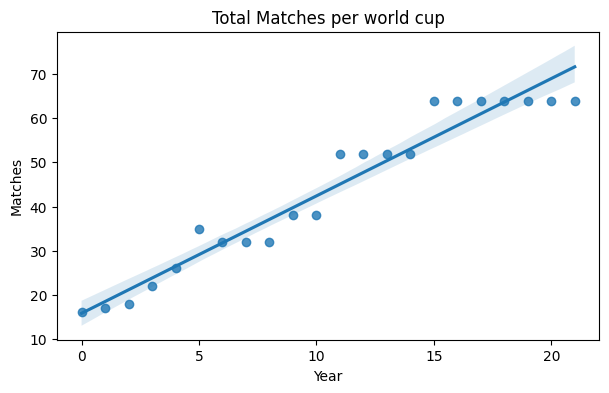

In [ ]:
plt.figure(figsize=(7,4))
sns.regplot(x=worldcup_summary.index, y=worldcup_summary["MATCHES PLAYED"])
plt.xlabel("Year")
plt.ylabel("Matches")
plt.title('Total Matches per world cup');

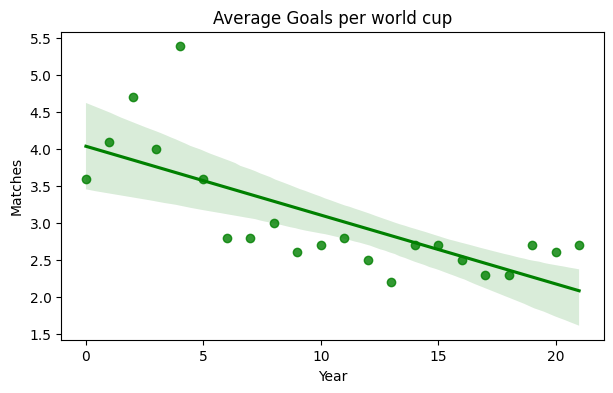

In [ ]:
plt.figure(figsize=(7,4))
sns.regplot(x=worldcup_summary.index, y=worldcup_summary["AVG GOALS PER GAME"], color='g')
plt.xlabel("Year")
plt.ylabel("Matches")
plt.title('Average Goals per world cup');

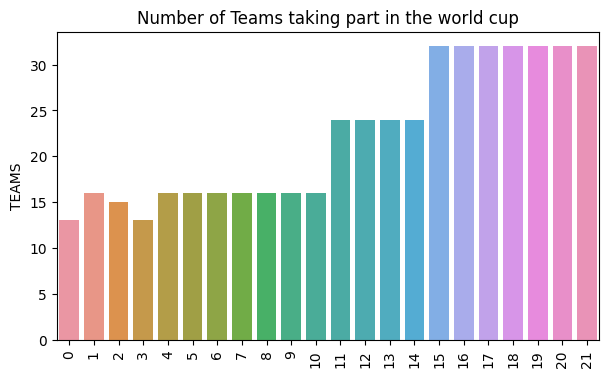

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=worldcup_summary, x=worldcup_summary.index, y="TEAMS")
plt.title('Number of Teams taking part in the world cup')
plt.xticks(rotation=90);

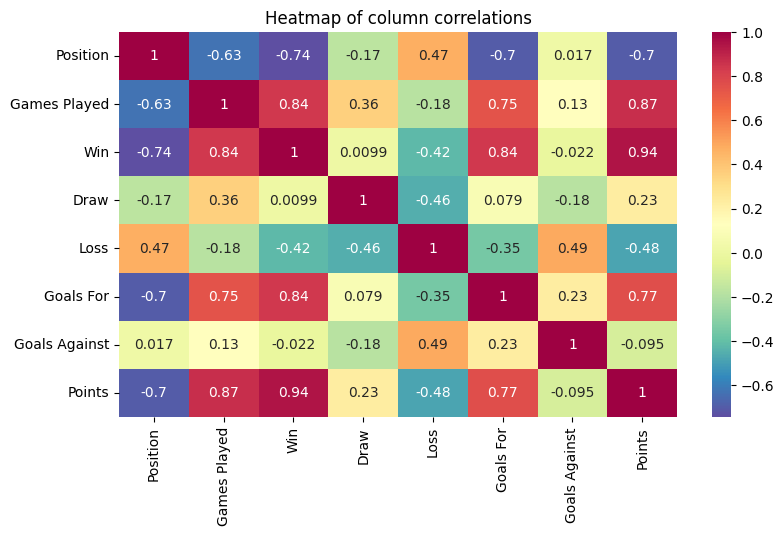

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(fifa[['Position', 'Team', 'Games Played', 'Win', 'Draw', 'Loss', 'Goals For',
       'Goals Against', 'Goal Difference', 'Points']].corr(), cmap='Spectral_r', annot=True)
plt.title('Heatmap of column correlations');

In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=7f5ce9a7a43aef838489d5e5c6820e49dd6d5e16a0a2cc7de8905744d1143781
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [ ]:
import plotly.express as px
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [ ]:
worldcup_summary["HOST"] = [countries.get(x, 'Unknown code') for x in worldcup_summary["HOST"]]

In [ ]:
worldcup_summary.loc[worldcup_summary["YEAR"] == 2018, "HOST"] = 'RUS'
worldcup_summary.loc[worldcup_summary["YEAR"] == 2002, "HOST"] = 'JPN'
worldcup_summary.loc[worldcup_summary["YEAR"] == 1966, "HOST"] = 'GBR'

In [ ]:
worldcup_summary.tail(50)

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER
0,1930,URY,Uruguay,Argentina,United States,13,16,70,3.6,True
1,1934,ITA,Italy,Czechoslovakia,Germany,16,17,70,4.1,True
2,1938,FRA,Italy,Hungary,Brazil,15,18,84,4.7,False
3,1950,BRA,Uruguay,Brazil,Sweden,13,22,88,4.0,False
4,1954,CHE,West Germany,Hungary,Austria,16,26,140,5.4,False
5,1958,SWE,Brazil,Sweden,France,16,35,126,3.6,False
6,1962,CHL,Brazil,Czechoslovakia,Chile,16,32,89,2.8,False
7,1966,GBR,England,West Germany,Portugal,16,32,89,2.8,True
8,1970,MEX,Brazil,Italy,West Germany,16,32,95,3.0,False
9,1974,Unknown code,West Germany,Netherlands,Poland,16,38,97,2.6,True


In [ ]:
fig = px.choropleth(worldcup_summary.sort_values("YEAR"), 
                    locations="HOST",
                    hover_name="HOST",
                    hover_data=worldcup_summary.columns,
                    color="AVG GOALS PER GAME",
                    range_color=(min(worldcup_summary["AVG GOALS PER GAME"]), max(worldcup_summary["AVG GOALS PER GAME"])), 
                    projection="natural earth",
                    animation_frame = "YEAR"
                   
                   )

fig.update_layout(margin={"r":5,"t":0,"l":5,"b":0})
fig.show()

In [ ]:
worldcup_summary.loc[(worldcup_summary["HOST"] == 'URY') | (worldcup_summary["HOST"] == 'BRA') | (worldcup_summary["HOST"] == 'CHL') | (worldcup_summary["HOST"] == 'ARG'), 
            "HOST_CONTINENT"] = 'South America'
worldcup_summary.loc[(worldcup_summary["HOST"] == 'ITA') | (worldcup_summary["HOST"] == 'FRA') | (worldcup_summary["HOST"] == 'DEU') | (worldcup_summary["HOST"] == 'GBR') | 
            (worldcup_summary["HOST"] == 'SWE') | (worldcup_summary["HOST"] == 'CHE') | (worldcup_summary["HOST"] == 'ESP'), 
            "HOST_CONTINENT"] = 'Europe'
worldcup_summary.loc[(worldcup_summary["HOST"] == 'QAT') | (worldcup_summary["HOST"] == 'JPN') | (worldcup_summary["HOST"] == 'RUS'), 
            "HOST_CONTINENT"] = 'Asia'
worldcup_summary.loc[(worldcup_summary["HOST"] == 'USA') | (worldcup_summary["HOST"] == 'MEX'), 
            "HOST_CONTINENT"] = 'North America'
worldcup_summary.loc[(worldcup_summary["HOST"] == 'ZAF'), 
            "HOST_CONTINENT"] = 'Africa'
worldcup_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER,HOST_CONTINENT
0,1930,URY,Uruguay,Argentina,United States,13,16,70,3.6,True,South America
1,1934,ITA,Italy,Czechoslovakia,Germany,16,17,70,4.1,True,Europe
2,1938,FRA,Italy,Hungary,Brazil,15,18,84,4.7,False,Europe
3,1950,BRA,Uruguay,Brazil,Sweden,13,22,88,4.0,False,South America
4,1954,CHE,West Germany,Hungary,Austria,16,26,140,5.4,False,Europe


In [ ]:
table = worldcup_summary['HOST_CONTINENT'].value_counts()
table.head()

Europe           9
South America    5
North America    3
Asia             3
Africa           1
Name: HOST_CONTINENT, dtype: int64

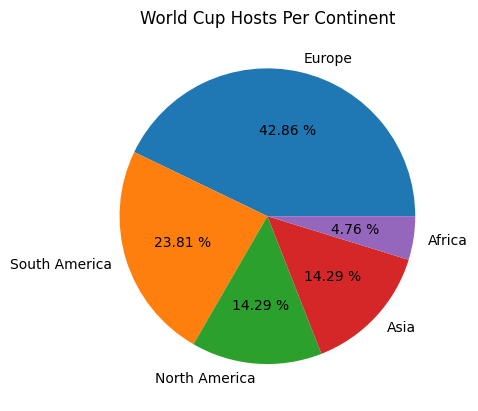

In [ ]:
plt.pie(table, labels=['Europe', 'South America', 'North America', 'Asia', 'Africa'], autopct='%.2f %%')
plt.title('World Cup Hosts Per Continent');

In [ ]:
worldcup_summary.loc[(worldcup_summary["CHAMPION"] == 'Uruguay') | (worldcup_summary["CHAMPION"] == 'Brazil') | (worldcup_summary["CHAMPION"] == 'Argentina'), 
            "CHAMPION_CONTINENT"] = 'South America'
worldcup_summary.loc[(worldcup_summary["CHAMPION"] == 'Italy') | (worldcup_summary["CHAMPION"] == 'Germany') | (worldcup_summary["CHAMPION"] == 'England') | (worldcup_summary["CHAMPION"] == 'France') | (worldcup_summary["CHAMPION"] == 'Spain'), 
            "CHAMPION_CONTINENT"] = 'Europe'
worldcup_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,HOST WINNER,HOST_CONTINENT,CHAMPION_CONTINENT
0,1930,URY,Uruguay,Argentina,United States,13,16,70,3.6,True,South America,South America
1,1934,ITA,Italy,Czechoslovakia,Germany,16,17,70,4.1,True,Europe,Europe
2,1938,FRA,Italy,Hungary,Brazil,15,18,84,4.7,False,Europe,Europe
3,1950,BRA,Uruguay,Brazil,Sweden,13,22,88,4.0,False,South America,South America
4,1954,CHE,West Germany,Hungary,Austria,16,26,140,5.4,False,Europe,NaN


In [ ]:
table1 = worldcup_summary['CHAMPION'].value_counts()
table1

Brazil          5
Italy           4
West Germany    3
Argentina       3
Uruguay         2
France          2
England         1
Spain           1
Germany         1
Name: CHAMPION, dtype: int64

Text(0.5, 1.0, 'World Cup Champion Distribution')

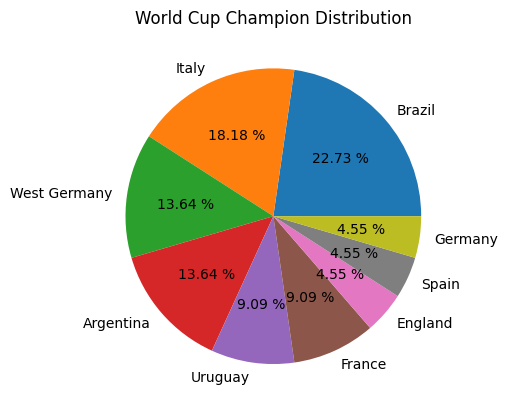

In [ ]:
plt.pie(table1, labels=['Brazil', 'Italy', 'West Germany', 'Argentina', 'Uruguay', 'France', 'England', 'Spain','Germany'], autopct='%.2f %%')
plt.title('World Cup Champion Distribution')

In [ ]:
table2 = worldcup_summary['CHAMPION_CONTINENT'].value_counts()
table2.head()

South America    10
Europe            9
Name: CHAMPION_CONTINENT, dtype: int64

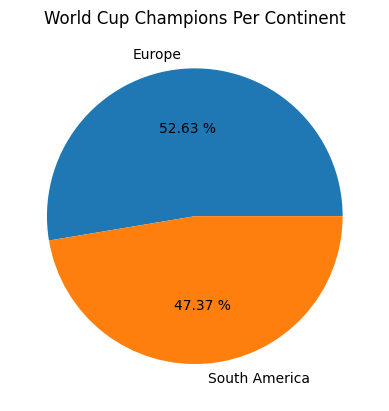

In [ ]:
plt.pie(table2, labels=['Europe', 'South America'], autopct='%.2f %%')
plt.title('World Cup Champions Per Continent');

# **Analisis de los Datos**

In [ ]:
# Columnas del Dataframe
worldcup_summary.columns

Index(['YEAR', 'HOST', 'CHAMPION', 'RUNNER UP', 'THIRD PLACE', 'TEAMS',
       'MATCHES PLAYED', 'GOALS SCORED', 'AVG GOALS PER GAME'],
      dtype='object')

In [ ]:
# Informacion del dataframe
worldcup_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                22 non-null     int64  
 1   HOST                22 non-null     object 
 2   CHAMPION            22 non-null     object 
 3   RUNNER UP           22 non-null     object 
 4   THIRD PLACE         22 non-null     object 
 5   TEAMS               22 non-null     int64  
 6   MATCHES PLAYED      22 non-null     int64  
 7   GOALS SCORED        22 non-null     int64  
 8   AVG GOALS PER GAME  22 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.7+ KB


In [ ]:
dict_columnas = {
    'YEAR' : ''
}

In [ ]:
# Estadisticas descriptivas
worldcup_summary.describe()

,YEAR,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1978.909091,22.227273,43.727273,123.636364,3.059091
std,27.738419,7.602830,17.776876,34.841882,0.831327
min,1930.000000,13.000000,16.000000,70.000000,2.200000
25%,1959.000000,16.000000,32.000000,90.500000,2.600000
50%,1980.000000,20.000000,45.000000,129.000000,2.700000
75%,2001.000000,32.000000,64.000000,146.750000,3.450000
max,2022.000000,32.000000,64.000000,172.000000,5.400000


In [ ]:
# Correlacion de variables
worldcup_summary.corr()

,YEAR,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
YEAR,1.000000,0.913915,0.971638,0.864387,-0.735115
TEAMS,0.913915,1.000000,0.954591,0.890161,-0.604204
MATCHES PLAYED,0.971638,0.954591,1.000000,0.894890,-0.742221
GOALS SCORED,0.864387,0.890161,0.894890,1.000000,-0.395432
AVG GOALS PER GAME,-0.735115,-0.604204,-0.742221,-0.395432,1.000000


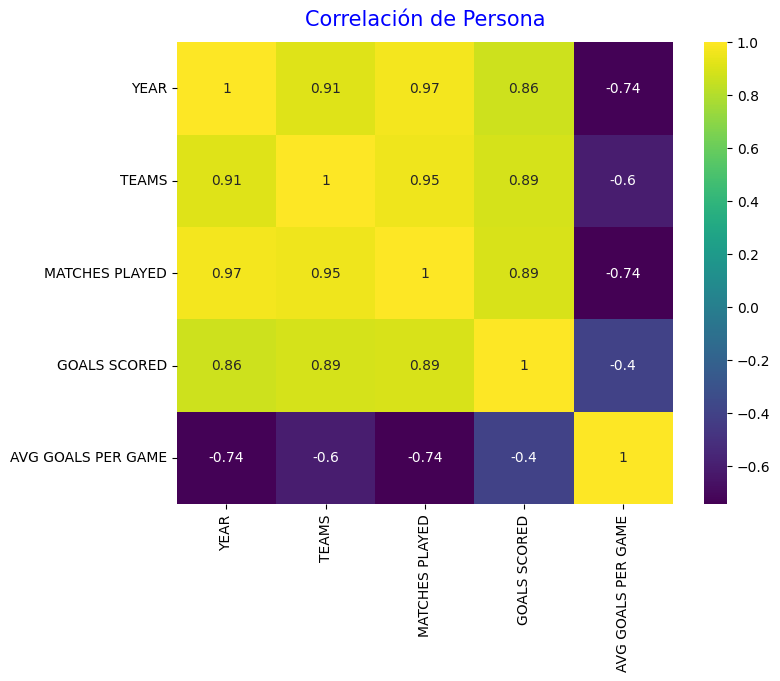

In [ ]:
# Visualización de la variable de correlación mediante la correlación de Pearson
plt.figure(figsize = (8,6))
sns.heatmap(worldcup_summary.corr(), annot = True, cmap = 'viridis')
plt.title('Correlación de Persona', fontsize = 15, pad = 12, color = 'b')
plt.show()

#**Gracias**